In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Given Informations

# total number of layers = 4
num_layers = 4

# width of each layer
H = np.array([200,10,20,20])

# velocity of seismic wave in each layer
V = np.array([1000,1500,2000,1600,2500])

# Amplitude of source signal (0.0 to 1.0), (1.0 to -1.0), (-1.0 to 0.0)
source_amplitudes =np.concatenate((np.arange(0.0,1.0,0.1),np.arange(1.0,- 1.0,-0.1), np.arange(-1.0,0.1,0.1),),axis=0)

# Sampling time interval
delta_t = 0.001

In [3]:
### Reflection & Transmission Coeffecient and Two-way travel time for each layer

# calculating Reflection and Transmission Coefficeints
reflection_coef = []
transmission_coef = []
for i in range(num_layers):
    v1=V[i]
    v2=V[i+1]
    rc = (v2-v1)/(v2+v1)
    rc = round(rc,3)
    tc = round(1-rc,3)
    reflection_coef.append(rc)
    transmission_coef.append(tc)

# calculating Two-way Travel times
two_way_travel_times = []
t=0
for i in range(num_layers):
    t+= 2*(H[i]/V[i])
    t=round(t,3)
    two_way_travel_times.append(t)

In [5]:
## Synthetic Signal

# creating time sequence from 0.0s upto 2.0s, time-interval = 0.001s
time_seq = np.arange(0.0,2.0,delta_t)

# function for creating synthetic signal response of layer at given index
def generate_signal(index,factor):
    cur_signal = [0]*len(time_seq)
    for a in source_amplitudes:
        cur_signal[index] = a*factor
        index+=1
    return cur_signal

# generating synthetic signal for each layer
synthetic_signal = []*num_layers
tc_factor = 1
for i in range(num_layers):
    twtt = two_way_travel_times[i]
    rc = reflection_coef[i]
    tc = transmission_coef[i]
    index = int(twtt/delta_t)
    cur_signal = generate_signal(index,rc*tc_factor)
    synthetic_signal.append(cur_signal)
    tc_factor = tc_factor * tc * (2-tc)
    # tc - for downward direction
    # (2-tc) - for upward direction

combined_signal = np.zeros(len(time_seq),dtype=float)
for i in range(num_layers): 
    combined_signal += np.array(synthetic_signal[i])

In [8]:
### Multiples

two_way_travel_times_first_multiples = two_way_travel_times*2
two_way_travel_times_second_multiples = two_way_travel_times*3

In [9]:
# function for creating multiples of signal response of layer at given index
def generate_multiple(index,factor):
    cur_multiple = [0]*len(time_seq)
    for a in source_amplitudes:
        cur_multiple[index] = a*factor
        index+=1
    return np.array(cur_multiple)

In [11]:
# generating first multiples for each layer
first_multiples = []*num_layers
tc_factor = 1
for i in range(num_layers):
    twtt = two_way_travel_times_first_multiples[i]
    rc = reflection_coef[i]
    tc = transmission_coef[i]
    index = int(twtt/delta_t)
    first_multiple = -1 * generate_multiple(index,(rc*tc_factor)**2)
    first_multiples.append(first_multiple)
    tc_factor = tc_factor * tc * (2-tc)
    
combined_first_multiples = np.zeros(len(time_seq))
for first_multiple in first_multiples:
    combined_first_multiples+=first_multiple

In [12]:
# generating second multiples for each layer
second_multiples = []*num_layers
tc_factor = 1
for i in range(num_layers):
    twtt = two_way_travel_times_second_multiples[i]
    rc = reflection_coef[i]
    tc = transmission_coef[i]
    index = int(twtt/delta_t)
    second_multiple = generate_multiple(index,(rc*tc_factor)**3)
    second_multiples.append(second_multiple)
    tc_factor = tc_factor * tc * (2-tc)
    
combined_second_multiples = np.zeros(len(time_seq))
for second_multiple in second_multiples:
    combined_second_multiples+=second_multiple

In [13]:
primary_reflections = combined_signal
first_multiple_reflections = combined_first_multiples
second_multiple_reflections = combined_second_multiples
complete_seismogram = (primary_reflections+first_multiple_reflections+second_multiple_reflections)

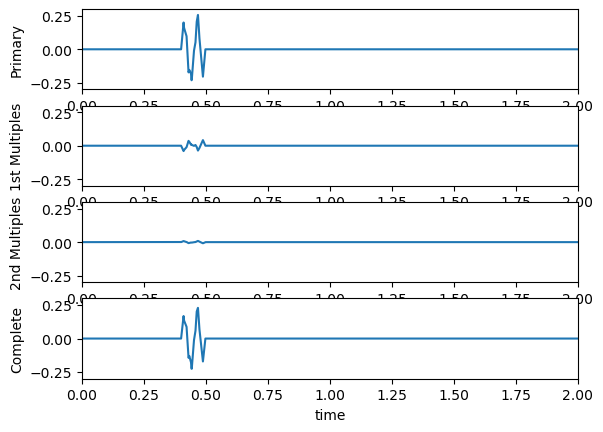

In [17]:
plt.subplot(4,1,1)
plt.plot(time_seq,primary_reflections)
plt.xlim([0,2.0])
plt.ylim([-0.3,0.3])
plt.xlabel('time')
plt.ylabel('Primary')

plt.subplot(4,1,2)
plt.plot(time_seq,first_multiple_reflections)
plt.xlim([0,2.0])
plt.ylim([-0.3,0.3])
plt.xlabel('time')
plt.ylabel('1st Multiples')

plt.subplot(4,1,3)
plt.plot(time_seq,second_multiple_reflections)
plt.xlim([0,2.0])
plt.ylim([-0.3,0.3])
plt.xlabel('time')
plt.ylabel('2nd Multiples')

plt.subplot(4,1,4)
plt.plot(time_seq,complete_seismogram)
plt.xlim([0,2.0])
plt.ylim([-0.3,0.3])
plt.xlabel('time')

plt.ylabel('Complete')
plt.show()